<a href="https://colab.research.google.com/github/Vishal487/ML-Kaggle-Titanic-prediction/blob/master/Kaggle_Titanic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#  drive/My Drive/Kaggle/Data/titanic/train.csv

In [ ]:
train_df = pd.read_csv('drive/My Drive/Kaggle/Data/titanic/train.csv')

In [ ]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train_df.shape

(891, 12)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_df['Age'].median()     # we'll filll age missing values with their median

28.0

In [ ]:
train_tmp = train_df.copy()

In [ ]:
train_tmp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# now let's create a function to preprocess the dataset

def preprocessing(dataframe):
    """
    take a pandas dataframe and preprocess it.
    do the following:-
    1. fill 'Age' column with thier median
    2. fill 'Embarked' column with value 'S'
    3. drop 'Ticket', 'Cabin', and 'Name' column
    4. convert 'Sex' and 'Embarked' col into numbers
    """
    dataset = dataframe.copy()

    # fill age colm with their median
    dataset['Age'].fillna(value=dataset['Age'].median(), inplace=True)

    # fill embarked column with S
    dataset['Embarked'].fillna(value='S', inplace=True)

    # let's drop Ticket and Cabin columns
    dataset.drop(['Ticket', 'Cabin', 'Name'], axis=1, inplace=True)

    # now we need to convert 'sex' and 'embarked' into numbers
    dataset['Sex'] = dataset['Sex'].astype('category')
    dataset['Embarked'] = dataset['Embarked'].astype('category')
    cat_columns = dataset.select_dtypes(['category']).columns
    # now change into numbers
    dataset[cat_columns] = dataset[cat_columns].apply(lambda x: x.cat.codes)

    return dataset

In [ ]:
preprocessed_train_data = preprocessing(train_tmp)

In [ ]:
preprocessed_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int8   
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int8   
dtypes: float64(2), int64(5), int8(2)
memory usage: 50.6 KB


In [ ]:
preprocessed_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


**Do the same thing for test data**

In [ ]:
test_df = pd.read_csv('drive/My Drive/Kaggle/Data/titanic/test.csv')

In [ ]:
test_tmp = test_df.copy()

In [ ]:
test_tmp.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Let's fill one missing value in 'Fare' column with value=median
test_tmp['Fare'].fillna(value=test_tmp['Fare'].median(), inplace=True)

In [ ]:
test_tmp.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
preprocessed_test_data = preprocessing(test_tmp)

In [ ]:
test_tmp.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
preprocessed_test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


## Modelling

**Import all required library**

In [ ]:
# to split data
from sklearn.model_selection import train_test_split, cross_val_score

# models we're going to use
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# to evaluate and tuninig
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

**split dataset into X and y**

In [ ]:
X = preprocessed_train_data.drop('Survived', axis=1)
y = preprocessed_train_data['Survived']

X.shape, y.shape

((891, 8), (891,))

**Split training data into training and validation set**

In [ ]:
# set random seed
np.random.seed(42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((712, 8), (179, 8), (712,), (179,))

In [ ]:
# let's create a dictionary of all models and instantiate
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}
          

In [ ]:
# let's create a function to fit the model and calculate the score

def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    take a dictionary of models and fit all the model on training data,
    and calculate the score on validation data
    and then return a dictionary of all model's scores
    """
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)  # fitting the model
        model_scores[name] = model.score(X_val, y_val)  # scoring
    return model_scores

In [ ]:
model_scores = fit_and_score(models, X_train, X_val, y_train, y_val)

model_scores     # note: ignore all the WARNINGS

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.659217877094972,
 'Logistic Regression': 0.7877094972067039,
 'Random Forest': 0.8212290502793296}

In [ ]:
model_scores

{'KNN': 0.659217877094972,
 'Logistic Regression': 0.7877094972067039,
 'Random Forest': 0.8212290502793296}

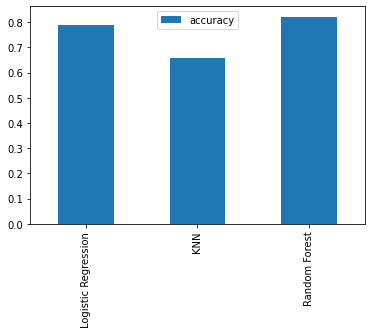

In [ ]:
# let's compare the model
pd.DataFrame(model_scores, index=['accuracy']).T.plot.bar();

for now onwards we'll consider only Logistic Regression and Random Forest

### Hyperparameter tuning

**RandomizedSearchCV**

In [ ]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
# let's create randomized search models

rs_models = {'rs_log_reg': RandomizedSearchCV(estimator=LogisticRegression(),
                                             param_distributions=log_reg_grid,
                                             cv=5,
                                             n_iter=20,
                                             verbose=True),
            'rs_random_forest': RandomizedSearchCV(estimator=RandomForestClassifier(),
                                                   param_distributions=rf_grid,
                                                   cv=5,
                                                   n_iter=20,
                                                   verbose=True)
            }

In [ ]:
rs_model_scores = fit_and_score(rs_models, X_train, X_val, y_train, y_val)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


In [ ]:
rs_model_scores

{'rs_log_reg': 0.7932960893854749, 'rs_random_forest': 0.8100558659217877}

In [ ]:
rs_models['rs_log_reg'].best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [ ]:
rs_models['rs_random_forest'].best_params_

{'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 260}

**GridSearchCV**

till now our `RandomForestClassifier` gives the best result we'll improve it using `GridSearchCV`

In [ ]:
gs_rf_grid = {"n_estimators": np.arange(10, 500, 50),
           "max_depth": [None, 10],
           "min_samples_split": np.arange(2, 6, 2),
           "min_samples_leaf": np.arange(2, 6, 2)}

gs_rf_model = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=gs_rf_grid,
                           cv=5,
                           n_jobs=10,
                           verbose=True)
gs_rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   19.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 400 out of 400 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
gs_rf_model.score(X_val, y_val)

0.8156424581005587

In [ ]:
gs_rf_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 110}

OKAY! let's create a new model with best_params and fit on complete training data and make predictions on test data


In [ ]:
X_train = X
y_train = y
X_test = preprocessed_test_data

X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [ ]:
new_model = RandomForestClassifier(n_estimators=110,
                                   max_depth=10,
                                   min_samples_leaf=2,
                                   min_samples_split=2)
new_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = new_model.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Create dataframe for submission

In [ ]:
submission_type = pd.read_csv('drive/My Drive/Kaggle/Data/titanic/gender_submission.csv')

In [ ]:
submission_type

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission = pd.DataFrame()

submission['PassengerId'] = X_test['PassengerId']
submission['Survived'] = predictions

In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('drive/My Drive/Kaggle/Data/titanic/titanic_submission.csv', index=False)

THANK YOU!!!